In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp

In [80]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e9 # qubit frequency 5 GHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi/2 rotation = ",np.pi/(2*delta_theta))
print("Total time for a pi/2 rotation= ",T_tot*1e9,' ns')
print("n = ", n)


pulse width =  1.033916924267275  ps
Seperation time =  200.0  ps
delta theta =  0.050448753037350386
pulses for a pi/2 rotation =  31.136474783270405
Total time for a pi/2 rotation=  6.4  ns
n =  62


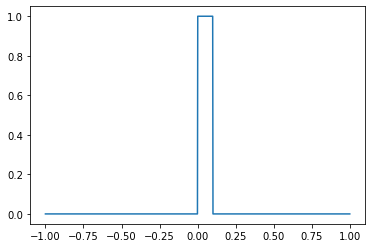

In [4]:
# def ddf(x,width):
#     val = np.zeros_like(x)
#     val[(-(width/2)<=x) & (x<=(width/2))] = 1
#     return val

def ddf(x,width):
    val = np.zeros_like(x)
    val[(0<=x) & (x<=(width))] = 1
    return val

plt.plot(np.linspace(-1,1,1000),ddf(np.linspace(-1,1,1000),0.1))

### Hamiltonian Evoluation without SFQ pulses

a1 = 15707963267.948965
a2 = 24396909491.478756


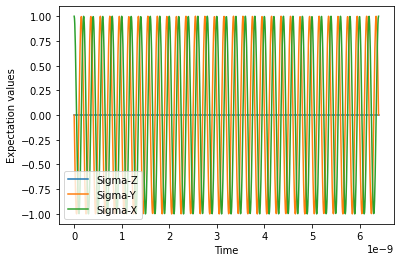

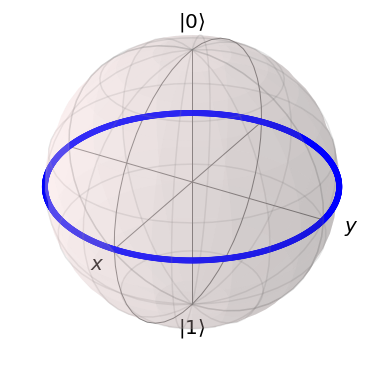

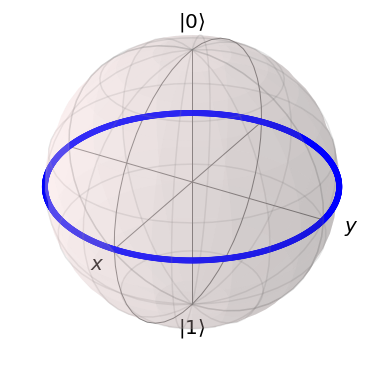

In [40]:
hbar = 1.054571817e-34
a1 = omega*0.5 # divided by hbar
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)
print("a1 =", a1)
print("a2 =", a2)

H_free = a1*(qeye(2) - sigmaz())

times = np.linspace(0,T_tot,1000)

#psi0 = basis(2, 0) # |0>
psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H_free, psi0, times, [sigmaz(), sigmay(),sigmax()])
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x,exp_y,exp_z]
b.add_points(pnts)
b.render()
b.show()




### Hamiltonian Evolution with SFQ pulses

n =  10
a1 = 15707963267.948967
a2 = 24396909491.478756
T_sep = 1


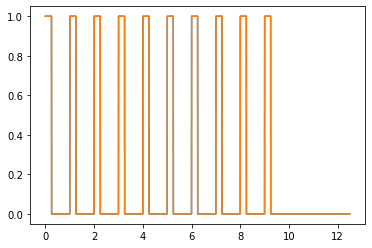

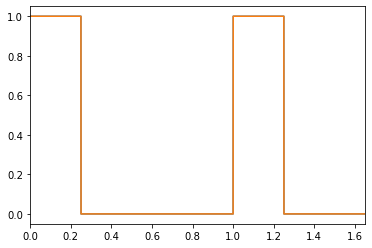

2e-10 1.033916924267275e-12 62


In [68]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
n = round(np.pi/(delta_theta)) # for a pi rotation about the y axis

n=10
T_sep = 1
pulse_width = 0.25
T_tot = (n ) * (T_sep+pulse_width)


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)
print("T_sep =", T_sep)



n_points = 1000000

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n-1):
    pulses = np.add(pulses,ddf(times-(i+1)*(T_sep),pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")

plt.plot(times,pulses)
plt.plot(times,pulse_func(times))
plt.show()

plt.plot(times,pulses)
plt.plot(times,pulse_func(times))
plt.xlim(0,(T_sep+2*pulse_width)*1.1)
plt.show()

# Reset variables
T_sep = 2*np.pi/omega # time between pulses
pulse_width = 1/(V_max*K_j)
n = round(np.pi/(delta_theta))

print(T_sep,pulse_width,n)


62.27294956654081
n =  64
a1 = 15707963267.948967
a2 = 24396909491.478756
10.0%. Run time:  19.22s. Est. time left: 00:00:02:53
20.0%. Run time:  38.32s. Est. time left: 00:00:02:33
30.0%. Run time:  57.26s. Est. time left: 00:00:02:13
40.0%. Run time:  76.09s. Est. time left: 00:00:01:54
50.0%. Run time:  95.16s. Est. time left: 00:00:01:35
60.0%. Run time: 114.09s. Est. time left: 00:00:01:16
70.0%. Run time: 132.94s. Est. time left: 00:00:00:56
80.0%. Run time: 151.85s. Est. time left: 00:00:00:37
90.0%. Run time: 170.85s. Est. time left: 00:00:00:18
Total run time: 189.74s


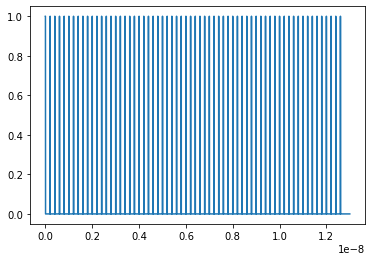

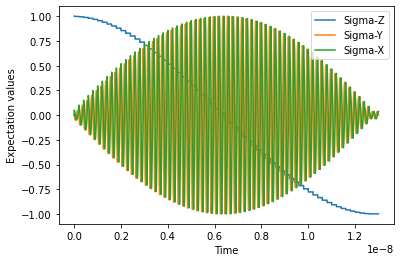

In [85]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

theta = np.pi #rotation angle

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) + 2  # for a theta rotation about the y axis
T_tot = (n + 1) * (T_sep)


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n-1):
    pulses = np.add(pulses,ddf(times-(i+1)*T_sep,pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")


#plt.plot(times,pulses)
plt.plot(times,pulse_func(times))

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, times, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

# b = qutip.Bloch()
# b.make_sphere()
# pnts = [exp_x,exp_y,exp_z]
# b.add_points(pnts)
# b.render()
# b.show()


1.28e-08
1.0
P1 =  0.9993050608950053


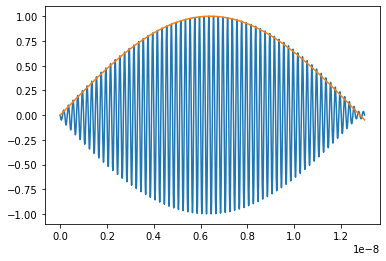

In [86]:
plt.plot(times,exp_y)
T_tot = (n) * T_sep
print(T_tot)
plt.plot(times,np.sin(np.pi*times*(1/T_tot)))
print(exp_z[0])
print("P1 = ",abs(exp_z[-1]))

# b = qutip.Bloch()
# b.make_sphere()
# pnts = [exp_x,exp_y,exp_z]
# b.add_points(pnts)
# b.render()
# b.show()

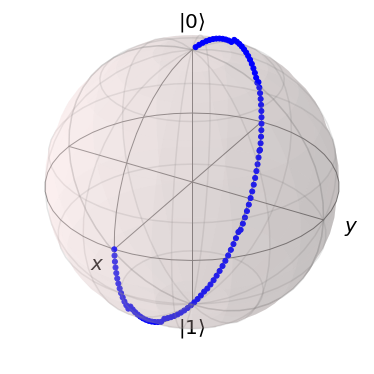

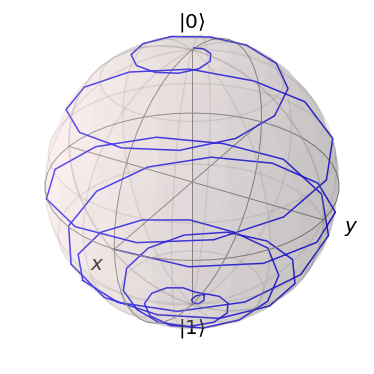

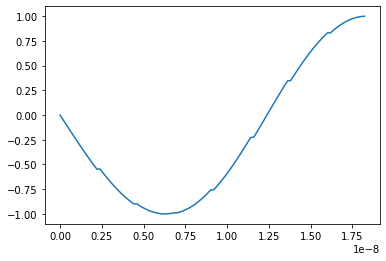

In [218]:
exp_z = result.expect[0]
#y_list = np.cos(np.pi*times*(1/T_tot))
y_list = [i*0 for i in result.expect[1]]
#x_list = [i*0 for i in result.expect[2]]
x_list = np.cos((3/2)*np.pi*times*(1/T_tot))
nskip = 10000
z_list = exp_z[::nskip]
y_list = y_list[::nskip]
x_list = x_list[::nskip]

plt.plot(times[::nskip],z_list)
b = qutip.Bloch()
b.make_sphere()
pnts = [x_list,y_list,z_list]
b.add_points(pnts)
b.render()
b.show()


b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x[::nskip],exp_y[::nskip],exp_z[::nskip]]
b.add_points(pnts,meth='l')
b.render()
b.show()


### Fluxonium Qubits ###
<br >

$\omega_{10} = 500$ MHz

In [91]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e8 # qubit frequency 500 MHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi rotation = ",np.pi/(delta_theta))
print("Total time for a pi/2 rotation= ",T_tot*1e9,' ns')
print("n = ", n)

pulse width =  1.033916924267275  ps
Seperation time =  2000.0000000000002  ps
delta theta =  0.01595329647133648
pulses for a pi rotation =  196.92435724706417
Total time for a pi/2 rotation=  198.0  ns
n =  197
0.0


196.92435724706417
n =  196
a1 = 1570796326.7948966
a2 = 7714980186.205317


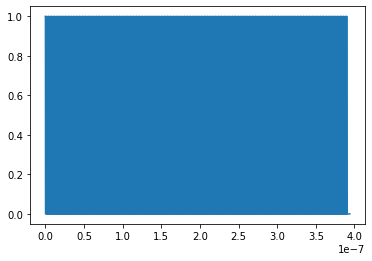

(2e-09, 2.001137308616694e-09)

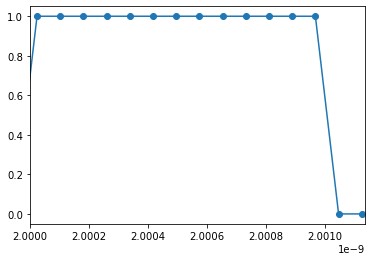

In [110]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

theta = np.pi #rotation angle

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) - 1   # for a theta rotation about the y axis
T_tot = (n + 1) * (T_sep)


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)

n_points = int(5e6)

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n-1):
    pulses = np.add(pulses,ddf(times-(i+1)*T_sep,pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")



plt.plot(times,pulse_func(times))
plt.show()

plt.scatter(times,pulses)
plt.plot(times,pulse_func(times))
plt.xlim(T_sep,T_sep+pulse_width*1.1)

196.92435724706417
n =  197
a1 = 1570796326.7948966
a2 = 7714980186.205317
10.0%. Run time: 192.77s. Est. time left: 00:00:28:54
20.0%. Run time: 391.19s. Est. time left: 00:00:26:04
30.0%. Run time: 583.22s. Est. time left: 00:00:22:40
40.0%. Run time: 772.22s. Est. time left: 00:00:19:18
50.0%. Run time: 960.14s. Est. time left: 00:00:16:00
60.0%. Run time: 1147.91s. Est. time left: 00:00:12:45
70.0%. Run time: 1336.26s. Est. time left: 00:00:09:32
80.0%. Run time: 1525.64s. Est. time left: 00:00:06:21
90.0%. Run time: 1714.47s. Est. time left: 00:00:03:10
Total run time: 1901.88s


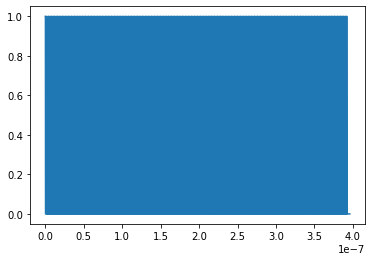

/Users/leon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


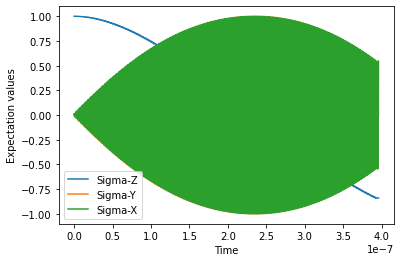

In [103]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*0.002*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar)

theta = np.pi #rotation angle

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta))    # for a theta rotation about the y axis
T_tot = (n + 1) * (T_sep)


print("n = ",n)
print("a1 =", a1)
print("a2 =", a2)

times = np.linspace(0,T_tot,n_points)
pulses = ddf(times,pulse_width)
for i in range(n-1):
    pulses = np.add(pulses,ddf(times-(i+1)*T_sep,pulse_width))
pulse_func = sp.interp1d(times,pulses,fill_value="extrapolate")


#plt.plot(times,pulses)
plt.plot(times,pulse_func(times))

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, times, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

3.94e-07
1.0
P1 =  0.8384611883399677


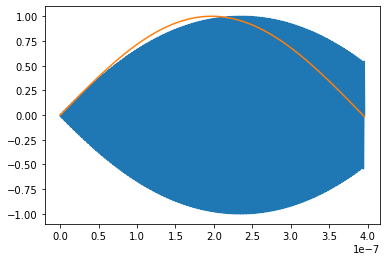

In [104]:
plt.plot(times,exp_y)
T_tot = (n) * T_sep
print(T_tot)
plt.plot(times,np.sin(np.pi*times*(1/T_tot)))
print(exp_z[0])
print("P1 = ",abs(exp_z[-1]))

### Gaussian pulses ###




In [142]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e9 # qubit frequency 5 GHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi/2 rotation = ",np.pi/(2*delta_theta))
print("Total time for a pi/2 rotation= ",T_tot*1e9,' ns')
print("n = ", n)

pulse width =  1.033916924267275  ps
Seperation time =  200.0  ps
delta theta =  0.050448753037350386
pulses for a pi/2 rotation =  31.136474783270405
Total time for a pi/2 rotation=  6.4  ns
n =  62


pulse width =  1.033916924267275  ps


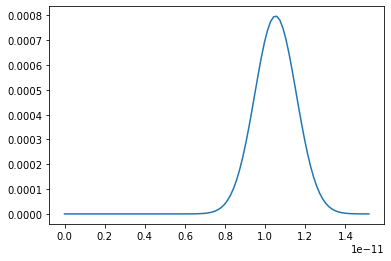

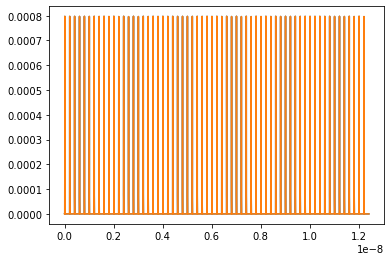

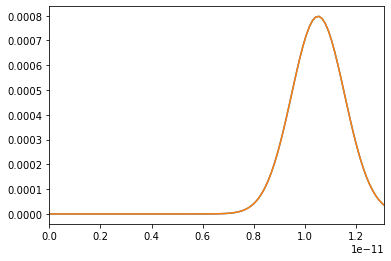

In [154]:
def normal_dist(x,x0,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))

t_delay = 10e-12

times = np.linspace(0,t_delay + 5*pulse_width,100)



print("pulse width = ",pulse_width*1e12,' ps')


plt.plot(times,Phi_0*normal_dist(times-t_delay,pulse_width/2,pulse_width))
plt.show()

#n=3

def normal_sfq(n,t_delay,pulse_width,T_sep,n_steps):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep,pulse_width))
    return t,pulse

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,1e5)
pulse_func = sp.interp1d(t,pulse)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()


a1 =  15707963267.948967
a2 =  12198454745739.379
62.27294956654081
n =  63


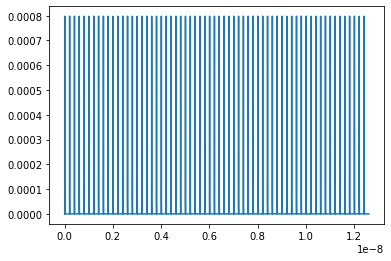

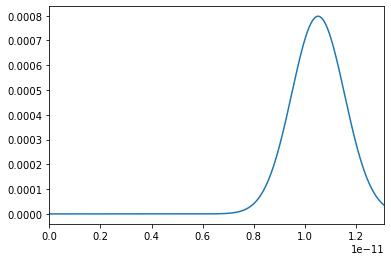

10.0%. Run time:  19.25s. Est. time left: 00:00:02:53
20.0%. Run time:  38.22s. Est. time left: 00:00:02:32
30.0%. Run time:  57.09s. Est. time left: 00:00:02:13
40.0%. Run time:  76.15s. Est. time left: 00:00:01:54
50.0%. Run time:  95.04s. Est. time left: 00:00:01:35
60.0%. Run time: 113.90s. Est. time left: 00:00:01:15
70.0%. Run time: 132.92s. Est. time left: 00:00:00:56
80.0%. Run time: 151.94s. Est. time left: 00:00:00:37
90.0%. Run time: 170.97s. Est. time left: 00:00:00:18
Total run time: 190.02s


/Users/leon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


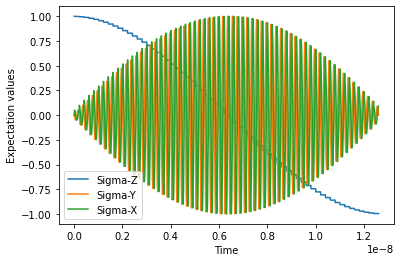

-0.9959161939495267


In [156]:
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar) # removed V_max from the equation

print("a1 = ",a1)
print("a2 = ",a2)

theta = np.pi #rotation angle

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) + 1
print("n = ", n)

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,1e6)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, t, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

print(exp_z[-1])